In [1]:
 # To implement the libraries
    
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
# Dataset
df=pd.read_csv("https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-3/Unit-3.2/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# To check if there is any null value in it
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]>

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### To check the relationship between features

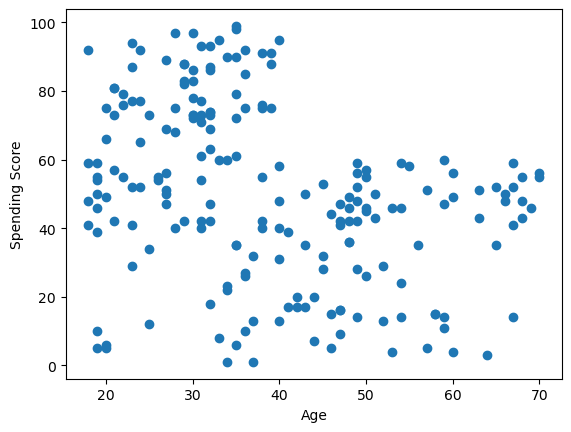

In [20]:
# Correlation between Age & Spending Score

plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

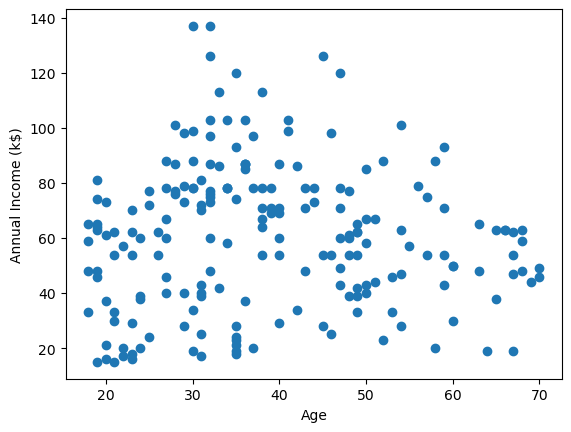

In [21]:
# Correlation between Age & Annual Income

plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

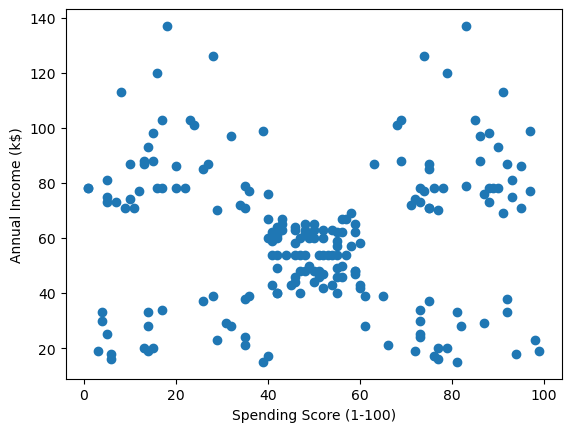

In [22]:
# Correlation between spending score & Annual Income

plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [26]:
# To display some particular columns

relevant_cols = ["Age", "Annual Income (k$)", 
         "Spending Score (1-100)"]
customer_df = df[relevant_cols]

In [27]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### For Scaling


In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler= StandardScaler()

In [32]:
scaler.fit(customer_df)

StandardScaler()

In [33]:
scaled_data = scaler.transform(customer_df)

In [34]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [35]:

def find_best_clusters(df, maximum_K):

  clusters_centers = []
  k_values = []

  for k in range(2, maximum_K):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)

  return clusters_centers, k_values

In [37]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [38]:
def generate_elbow_plot(clusters_centers, k_values):

  figure = plt.subplots(figsize = (12, 6))
  plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
  plt.xlabel("Number of Clusters (K)")
  plt.ylabel("Cluster Inertia")
  plt.title("Elbow Plot of KMeans")
  plt.show()

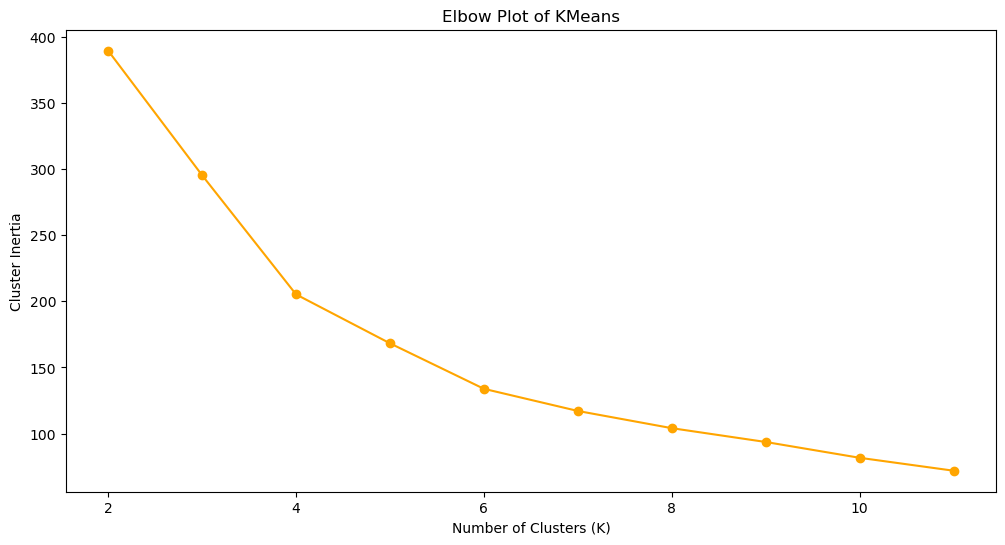

In [39]:
generate_elbow_plot(clusters_centers, k_values)

In [41]:
kmeans_model = KMeans(n_clusters=5)

In [43]:
kmeans_model.fit(scaled_data)

C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishabh Maurya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [45]:
df["clusters"] = kmeans_model.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


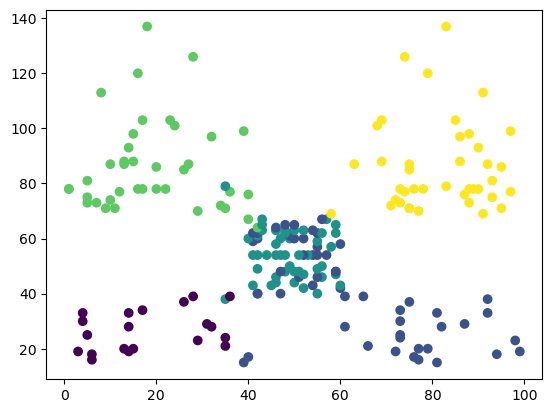

In [46]:

plt.scatter(df["Spending Score (1-100)"], 

      df["Annual Income (k$)"], 

      c = df["clusters"]

      )